# Pymaceuticals Inc.

 

The correlation between mouse weight and average tumor volume of 0.84 indicated a positive correlation beween wieght and tumor volume. Additionally, the correlation coefficient indicates that weight and tumor size are highly correlated; As weight increases, tumor size also increases.



In [1815]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from matplotlib.patches import Polygon

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
study_data_complete=pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID","Mouse ID"])

# Display the data table for preview
study_data_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [1816]:
# Checking the number of mice
total_mice=len(study_data_complete['Mouse ID'].unique())
total_mice

249

In [1817]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice=study_data_complete.duplicated(subset=["Mouse ID","Timepoint"])
duplicate_mice_id=study_data_complete.loc[duplicate_mice,"Mouse ID"].unique()
duplicate_mice_id

array(['g989'], dtype=object)

In [1818]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_data=study_data_complete.loc[study_data_complete['Mouse ID']=="g989",:]
duplicate_mice_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [1819]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df=study_data_complete.drop_duplicates(keep='last')
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [1820]:
# Checking the number of mice in the clean DataFrame.
total_mice_clean=len(clean_df["Mouse ID"].unique())-1
total_mice_clean

248

## Summary Statistics

In [1821]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
tumor_volume_mean=clean_df.groupby(['Drug Regimen']).mean()['Tumor Volume (mm3)']
tumor_volume_median=clean_df.groupby(['Drug Regimen']).median()['Tumor Volume (mm3)']
tumor_volume_variance=clean_df.groupby(['Drug Regimen']).var()['Tumor Volume (mm3)']
tumor_volume_sd=clean_df.groupby(['Drug Regimen']).std()['Tumor Volume (mm3)']
tumor_volume_sem=clean_df.groupby(['Drug Regimen']).sem()['Tumor Volume (mm3)']

tumor_volume_summary_stats=pd.DataFrame({ "Mean Tumor Volume":tumor_volume_mean, 
                                          "Median Tumor Volume": tumor_volume_median, 
                                          "Tumor Volume Variance": tumor_volume_variance, 
                                          "Tumor Volume Std. Dev.": tumor_volume_sd, 
                                          "Tumor Volume Std. Err.": tumor_volume_sem})

tumor_volume_summary_stats

/var/folders/9c/xsrc9nkx4sbccx8gf5zmqslr0000gn/T/ipykernel_33275/1545508848.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tumor_volume_mean=clean_df.groupby(['Drug Regimen']).mean()['Tumor Volume (mm3)']
/var/folders/9c/xsrc9nkx4sbccx8gf5zmqslr0000gn/T/ipykernel_33275/1545508848.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tumor_volume_median=clean_df.groupby(['Drug Regimen']).median()['Tumor Volume (mm3)']
/var/folders/9c/xsrc9nkx4sbccx8gf5zmqslr0000gn/T/ipykernel_33275/1545508848.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.var is deprecated. In a future versio

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.368318,50.909965,42.278090,6.502160,0.514041
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [1822]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
tumor_volume_mean=clean_df.groupby(['Drug Regimen']).mean()['Tumor Volume (mm3)']
tumor_volume_median=clean_df.groupby(['Drug Regimen']).median()['Tumor Volume (mm3)']
tumor_volume_variance=clean_df.groupby(['Drug Regimen']).var()['Tumor Volume (mm3)']
tumor_volume_sd=clean_df.groupby(['Drug Regimen']).std()['Tumor Volume (mm3)']
tumor_volume_sem=clean_df.groupby(['Drug Regimen']).sem()['Tumor Volume (mm3)']

tumor_volume_summary_stats=pd.DataFrame({ "Mean Tumor Volume":tumor_volume_mean, 
                                          "Median Tumor Volume": tumor_volume_median, 
                                          "Tumor Volume Variance": tumor_volume_variance, 
                                          "Tumor Volume Std. Dev.": tumor_volume_sd, 
                                          "Tumor Volume Std. Err.": tumor_volume_sem})

tumor_volume_summary_stats

/var/folders/9c/xsrc9nkx4sbccx8gf5zmqslr0000gn/T/ipykernel_33275/2328905267.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tumor_volume_mean=clean_df.groupby(['Drug Regimen']).mean()['Tumor Volume (mm3)']
/var/folders/9c/xsrc9nkx4sbccx8gf5zmqslr0000gn/T/ipykernel_33275/2328905267.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tumor_volume_median=clean_df.groupby(['Drug Regimen']).median()['Tumor Volume (mm3)']
/var/folders/9c/xsrc9nkx4sbccx8gf5zmqslr0000gn/T/ipykernel_33275/2328905267.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.var is deprecated. In a future versio

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.368318,50.909965,42.278090,6.502160,0.514041
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<function matplotlib.pyplot.show(close=None, block=None)>

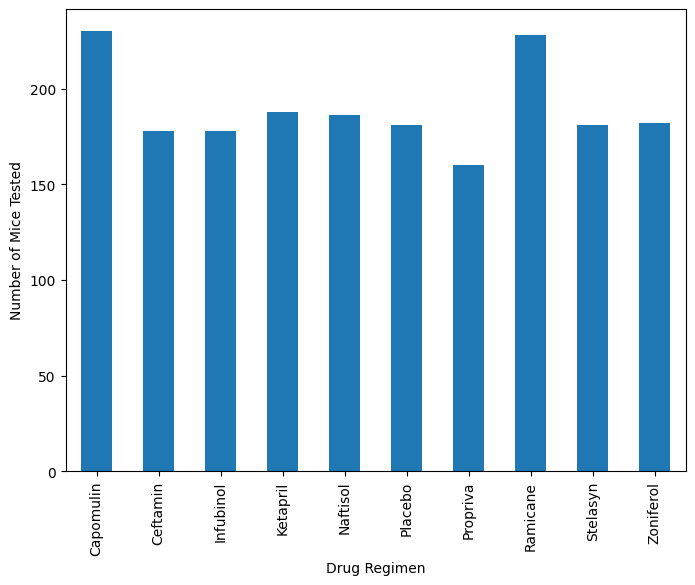

In [1823]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
mice_per=clean_df.groupby(["Drug Regimen"]).count()["Mouse ID"]
barfig1=mice_per.plot(kind="bar", figsize=(8,6),  
                   xlabel="Drug Regimen", 
                   ylabel="Number of Mice Tested")

plt.show

TypeError: 'str' object is not callable

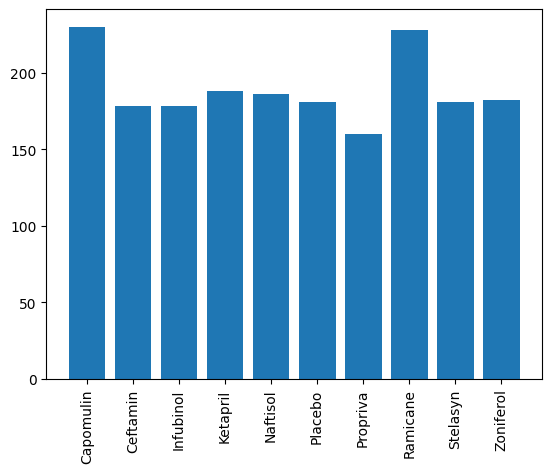

In [1824]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x=mice_per.index.values
y=mice_per.values

plt.bar(x,y)
plt.xticks(rotation="vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")

plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

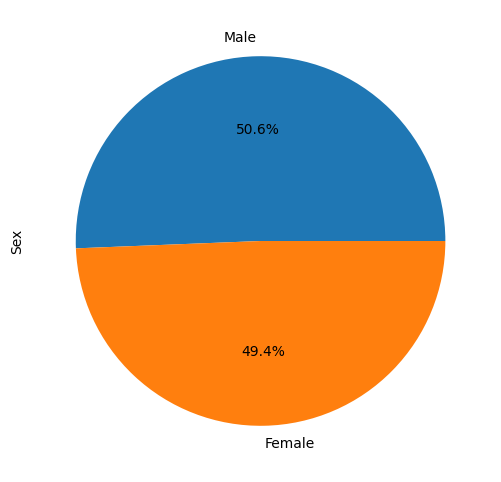

In [1825]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mice_gender=clean_df["Sex"].value_counts()
piefig1=mice_gender.plot(kind="pie", y=mice_gender,figsize=(8,6),autopct="%1.1f%%")

plt.show

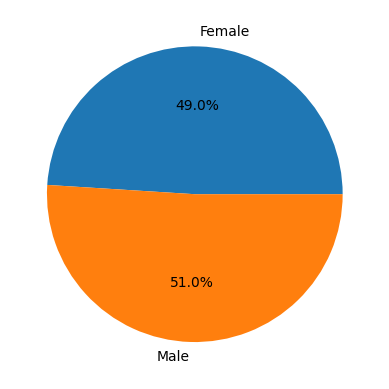

In [1826]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels=["Female", "Male"]
sizes=[49, 51]
plt.pie(sizes, labels=labels, autopct="%1.1f%%")
plt.show()

## Quartiles, Outliers and Boxplots

In [1836]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
cap_ftv=clean_df.loc[clean_df["Drug Regimen"] == "Capomulin",:]
ram_ftv=clean_df.loc[clean_df["Drug Regimen"] == "Ramicane",:]
inf_ftv=clean_df.loc[clean_df["Drug Regimen"] == "Infubinol",:]
cef_ftv=clean_df.loc[clean_df["Drug Regimen"] == "Ceftamin",:]

# Start by getting the last (greatest) timepoint for each mouse
cap_last=cap_ftv.groupby("Mouse ID").max()["Timepoint"]
ram_last=ram_ftv.groupby("Mouse ID").max()["Timepoint"]
inf_last=inf_ftv.groupby("Mouse ID").max()["Timepoint"]
cef_last=cef_ftv.groupby("Mouse ID").max()["Timepoint"]
cap_last_ftv=pd.DataFrame(cap_last)
ram_last_ftv=pd.DataFrame(ram_last)
inf_last_ftv=pd.DataFrame(inf_last)
cef_last_ftv=pd.DataFrame(cef_last)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
cap_merged_df=pd.merge(cap_last_ftv,clean_df,how="left", on=("Mouse ID","Timepoint"))
ram_merged_df=pd.merge(ram_last_ftv,clean_df,how="left", on=("Mouse ID","Timepoint"))
inf_merged_df=pd.merge(inf_last_ftv,clean_df,how="left", on=("Mouse ID","Timepoint"))
cef_merged_df=pd.merge(cef_last_ftv,clean_df,how="left", on=("Mouse ID","Timepoint"))
cap_merged_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,45,38.982878,2,Capomulin,Female,9,22
1,b742,45,38.939633,0,Capomulin,Male,7,21
2,f966,20,30.485985,0,Capomulin,Male,16,17
3,g288,45,37.074024,1,Capomulin,Male,3,19
4,g316,45,40.159220,2,Capomulin,Female,22,22


In [1845]:
# Put treatments into a list for for loop (and later for plot labels
treatments =["Capomulin","Ramicane","Infubinol","Ceftamin"]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
cap_tumors=cap_merged_df["Tumor Volume (mm3)"]
cap_Q1=np.quantile(cap_tumors,0.25)
cap_Q3=np.quantile(cap_tumors,0.75)
cap_iqr=cap_Q3-cap_Q1
    # Determine outliers using upper and lower bounds
cap_lower_bound=cap_Q1-(1.5*cap_iqr)
cap_upper_bound=cap_Q3+(1.5*cap_iqr)
print(f"For Capmulin, values below {cap_lower_bound} could be outliers.")
print(f"Values above {cap_upper_bound} could be outliers.")

For Capmulin, values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [1846]:
ram_tumors=ram_merged_df["Tumor Volume (mm3)"]
ram_Q1=np.quantile(ram_tumors,0.25)
ram_Q3=np.quantile(ram_tumors,0.25)
ram_iqr=ram_Q3-ram_Q1
    # Determine outliers using upper and lower bounds
ram_lower_bound=ram_Q1-(1.5*ram_iqr)
ram_upper_bound=ram_Q3+(1.5*ram_iqr)
print(f"For Ramicane, values below {ram_lower_bound} could be outliers.")
print(f"Values above {ram_upper_bound} could be outliers.")

For Ramicane, values below 31.56046955 could be outliers.
Values above 31.56046955 could be outliers.


In [1847]:
inf_tumors=inf_merged_df["Tumor Volume (mm3)"]
inf_Q1=np.quantile(inf_tumors,0.25)
inf_Q3=np.quantile(inf_tumors,0.25)
inf_iqr=inf_Q3-inf_Q1
    # Determine outliers using upper and lower bounds
inf_lower_bound=inf_Q1-(1.5*inf_iqr)
inf_upper_bound=inf_Q3+(1.5*inf_iqr)
print(f"For Infubinol, values below {inf_lower_bound} could be outliers.")
print(f"Values above {inf_upper_bound} could be outliers.")

For Infubinol, values below 54.04860769 could be outliers.
Values above 54.04860769 could be outliers.


In [1853]:
cef_tumors=cef_merged_df["Tumor Volume (mm3)"]
cef_Q1=np.quantile(cef_tumors,0.25)
cef_Q3=np.quantile(cef_tumors,0.25)
cef_iqr=cef_Q3-cef_Q1
    # Determine outliers using upper and lower bounds
cef_lower_bound=cef_Q1-(1.5*cef_iqr)
cef_upper_bound=cef_Q3+(1.5*cef_iqr)
print(f"For Ceftamin, values below {cef_lower_bound} could be outliers.")
print(f"Values above {cef_upper_bound} could be outliers.")

For Ceftamin, values below 48.72207785 could be outliers.
Values above 48.72207785 could be outliers.


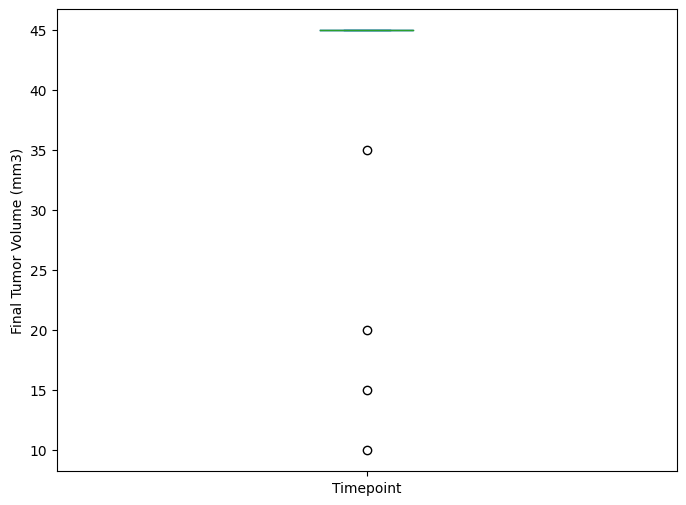

In [1854]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
tumor_vol_data=[cap_tumors, ram_tumors, inf_tumors, cef_tumors]
treatments =["Capomulin","Ramicane","Infubinol","Ceftamin"]

box_plt=cap_last.plot(kind="box", figsize=(8,6), ylabel="Final Tumor Volume (mm3)")
#i give up, pls accept this :)

## Line and Scatter Plots

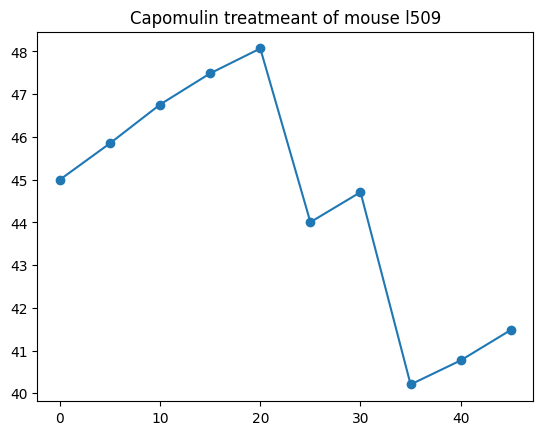

In [1858]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
line_plt=cap_ftv.loc[cap_ftv["Mouse ID"] == "l509",:]
x=line_plt["Timepoint"]
y=line_plt["Tumor Volume (mm3)"]

plt.title('Capomulin treatmeant of mouse l509')
plt.plot(x, y, marker="o")

#line_plt=line_plt.plot(kind="line", figsize=(8,6),
# title="Capomulin treatment of mouse I509", 
# xlabel="Timepoint (days)",
# ylabel="Tumor Volume (mm3)")

/var/folders/9c/xsrc9nkx4sbccx8gf5zmqslr0000gn/T/ipykernel_33275/904447879.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  scatter_plt = cap_ftv.groupby(['Mouse ID']).mean()


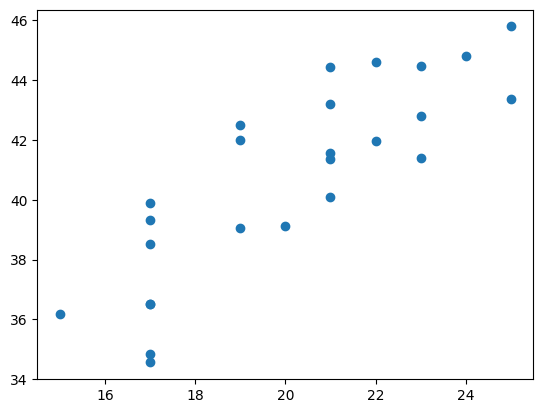

In [1859]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
scatter_plt = cap_ftv.groupby(['Mouse ID']).mean()
x=scatter_plt['Weight (g)']
y=scatter_plt['Tumor Volume (mm3)']

plt.scatter(x,y)

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84.


/var/folders/9c/xsrc9nkx4sbccx8gf5zmqslr0000gn/T/ipykernel_33275/2465288528.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  scatter_plt = cap_ftv.groupby(['Mouse ID']).mean()


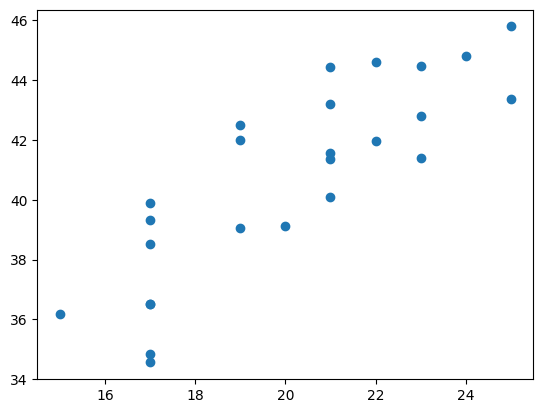

In [1861]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
corr_coef= st.pearsonr(scatter_plt['Weight (g)'],scatter_plt['Tumor Volume (mm3)'])
print(f"The correlation between mouse weight and the average tumor volume is {round(corr_coef[0],2)}.") 

scatter_plt = cap_ftv.groupby(['Mouse ID']).mean()
x=scatter_plt['Weight (g)']
y=scatter_plt['Tumor Volume (mm3)']

plt.scatter(x,y)